In [2]:
from pm4py.algo.filtering.log.start_activities import start_activities_filter
from pm4py.algo.filtering.log.end_activities import end_activities_filter
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.filtering.log.variants import variants_filter
from pm4py.statistics.traces.generic.log import case_statistics
from pm4py.algo.filtering.log.attributes import attributes_filter
 
from pm4py.algo.discovery.alpha import algorithm as alpha_miner
from pm4py.visualization.petri_net import visualizer as pn_visualizer

parsing log, completed traces :: 100%|██████████| 31509/31509 [00:47<00:00, 656.68it/s]


Process starts with 1 no of activities, and {'A_Create Application': 31509} activities
Process ends with 12 no of activities, and {'W_Validate application': 12662, 'O_Cancelled': 4436, 'W_Call after offers': 9457, 'W_Call incomplete files': 4676, 'W_Complete application': 144, 'W_Assess potential fraud': 102, 'W_Personal Loan collection': 2, 'W_Shortened completion ': 5, 'A_Denied': 1, 'O_Sent (online only)': 8, 'O_Sent (mail and online)': 15, 'O_Returned': 1} activities
Process have 15930 of variants with the logs
Process variants 50.556983718937445% with no of logs
No of activities 26 of activities {'A_Create Application': 31509, 'A_Submitted': 20423, 'W_Handle leads': 47264, 'W_Complete application': 148900, 'A_Concept': 31509, 'A_Accepted': 31509, 'O_Create Offer': 42995, 'O_Created': 42995, 'O_Sent (mail and online)': 39707, 'W_Call after offers': 191092, 'A_Complete': 31362, 'W_Validate application': 209496, 'A_Validating': 38816, 'O_Returned': 23305, 'W_Call incomplete files': 1

replaying log with TBR, completed variants :: 100%|██████████| 15930/15930 [00:37<00:00, 421.77it/s]


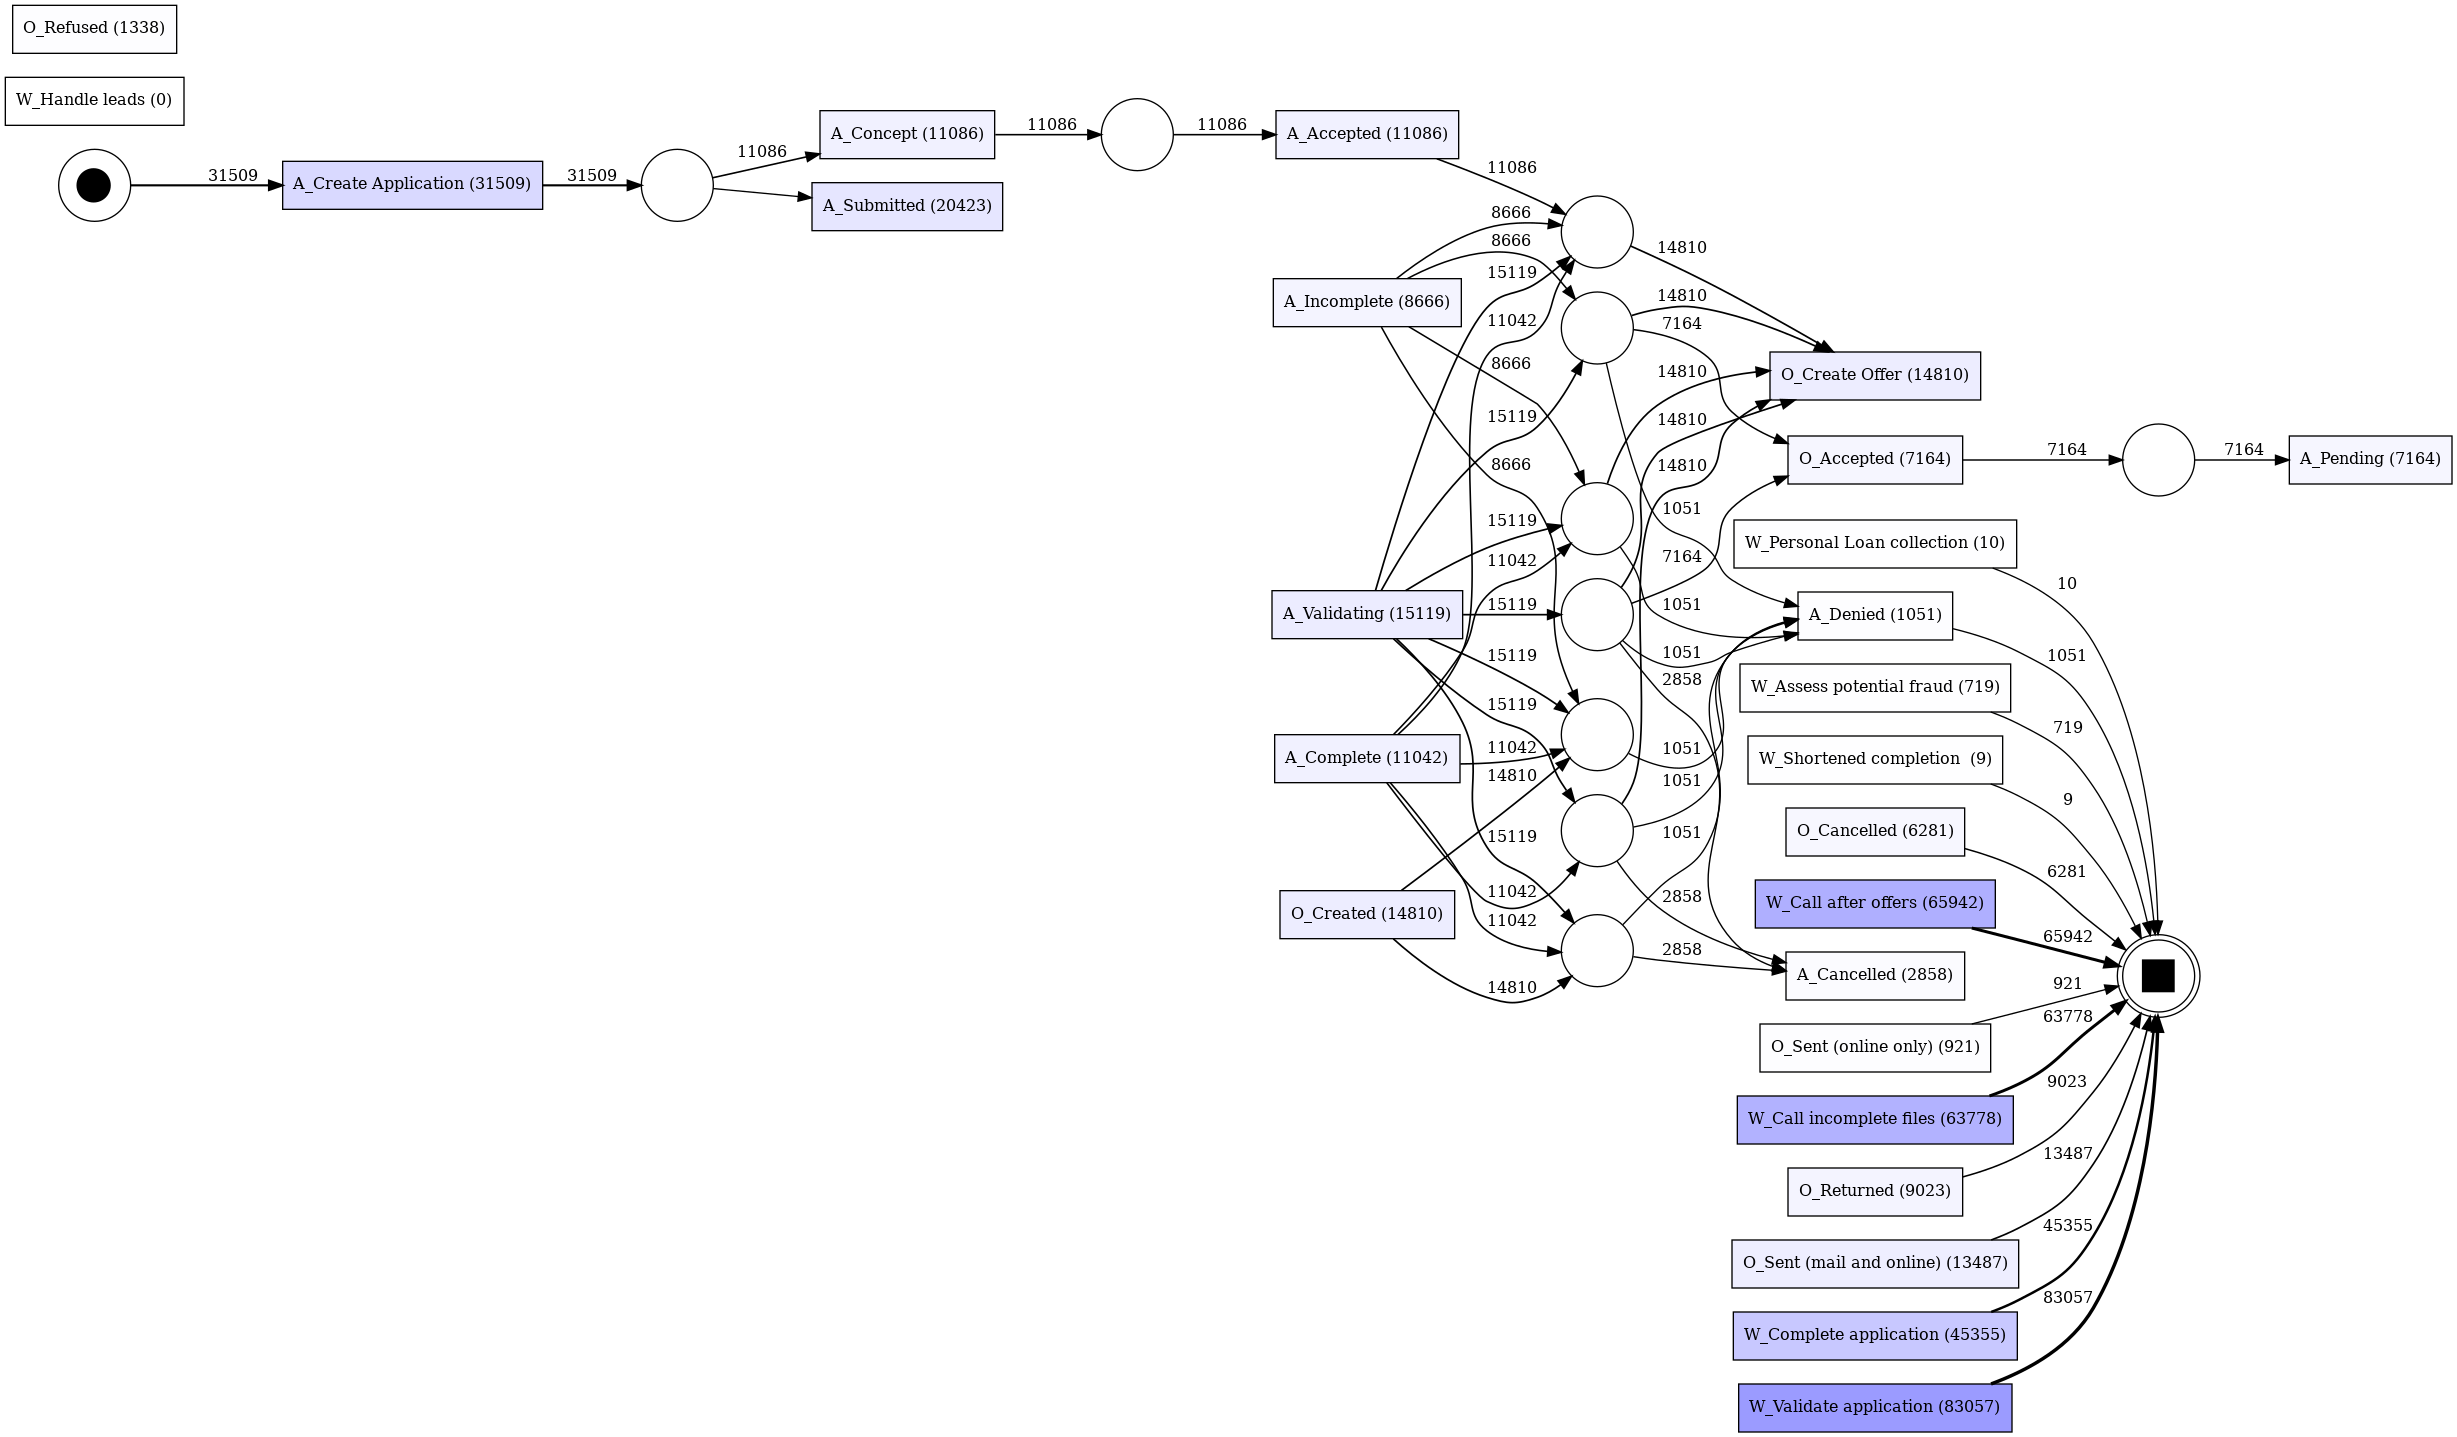

None


In [5]:
class Handler():
    
    def fileReader(self, event_log):
        event_log = xes_importer.apply(event_log)
        return event_log
    
    def genaralDataInformation(self, event_log):
        reader = self.fileReader(event_log)
        log_start = start_activities_filter.get_start_activities(reader)
        end_activities = end_activities_filter.get_end_activities(reader)
        
        print(f"Process starts with {len(log_start)} no of activities, and {log_start} activities" )
 
        print(f"Process ends with {len(end_activities)} no of activities, and {end_activities} activities")
        
        variants = variants_filter.get_variants(reader)
        print(f"Process have {len(variants)} of variants with the logs") 
        
        variants_count = case_statistics.get_variant_statistics(reader)
        variants_count = sorted(variants_count, key=lambda x: x['count'], reverse=True)
        # variants_count[:10]
        print(f"Process variants {len(variants) / len(reader) * 100}% with no of logs")
        
        activities = attributes_filter.get_attribute_values(reader, "concept:name")
        print(f"No of activities {len(activities)} of activities {activities}")
        
    def alphaMiner(self, event_log):
        reader = self.fileReader(event_log)
        net, initial_marking, final_marking = alpha_miner.apply(reader)
        parameters = {pn_visualizer.Variants.FREQUENCY.value.Parameters.FORMAT: "png"}
        gviz = pn_visualizer.apply(net, initial_marking, final_marking, parameters=parameters, variant=pn_visualizer.Variants.FREQUENCY, log=reader)
        pn_visualizer.save(gviz, "alpha_graph.png")
        pn_visualizer.view(gviz)
        
        
c = Handler()
file = 'bpi_challenge_2017.xes'
data = c.genaralDataInformation(file)
data = c.alphaMiner(file)
print(data)